In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
train_data =pd.read_csv("/kaggle/input/datathon2023/train.csv")
test_data=pd.read_csv("/kaggle/input/datathon2023/test_x.csv")
sample=pd.read_csv('/kaggle/input/datathon2023/sample_submission.csv')

In [39]:
x_train=train_data.iloc[:,1:14]
y_train = train_data.iloc[:,12:13] #dependent variable
x_train.drop(['Öbek İsmi'],axis='columns',inplace = True)
kolon_adlari=['cinsiyet','yas','medeni','egitim','istihdam','gelir','sehir','urun','miktar','adet','egitim2','sepet_adet']
y_kolon_adi=['obek']
x_train.columns=kolon_adlari
y_train.columns=y_kolon_adi
train=pd.concat([x_train,y_train],axis='columns')

In [40]:
#veriyi tanıma
x_train.head()

,cinsiyet,yas,medeni,egitim,istihdam,gelir,sehir,urun,miktar,adet,egitim2,sepet_adet
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459


In [41]:
#veri tipleri hakkında bilgi edinme
train.describe(include="O")

,cinsiyet,yas,medeni,egitim,istihdam,sehir,urun,egitim2,obek
count,5460,5460,5460,5460,5460,5460,5460,5460,5460
unique,2,5,2,9,4,4,5,2,8
top,Erkek,18-30,Evli,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Giyim,Etmiyor,obek_4
freq,2964,1841,2834,1388,2768,1959,1487,4554,720


In [42]:
#kategorik ve nümerik değişkenleri tanımlama
kategorik=['cinsiyet','yas','medeni','egitim','istihdam','sehir','urun','egitim2']
train.describe()
numerik=['gelir','miktar','adet','sepet_adet']

In [43]:
#tekrarlayan satır kontrolü
train[train.duplicated()]

,cinsiyet,yas,medeni,egitim,istihdam,gelir,sehir,urun,miktar,adet,egitim2,sepet_adet,obek


In [44]:
#hedef değişkenin dağılımı hakkında bilgi edinme
y_train.obek.value_counts(normalize=True)

obek_4    0.131868
obek_8    0.131319
obek_5    0.129304
obek_3    0.127289
obek_7    0.127289
obek_1    0.126740
obek_6    0.126007
obek_2    0.100183
Name: obek, dtype: float64

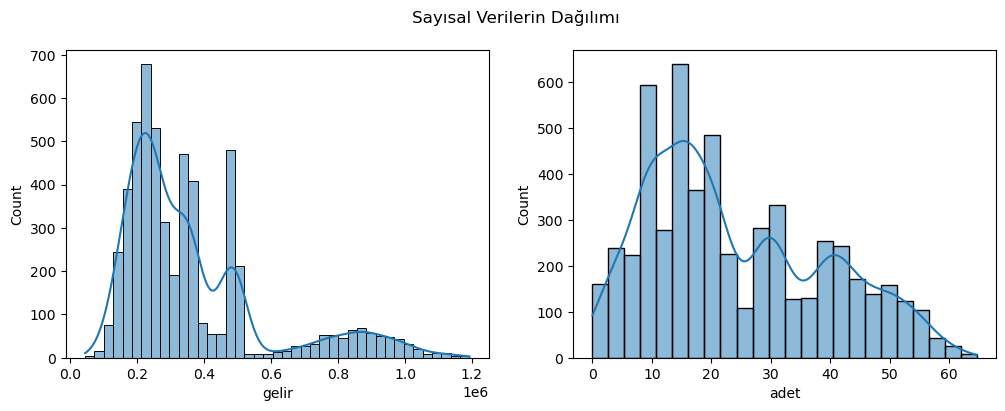

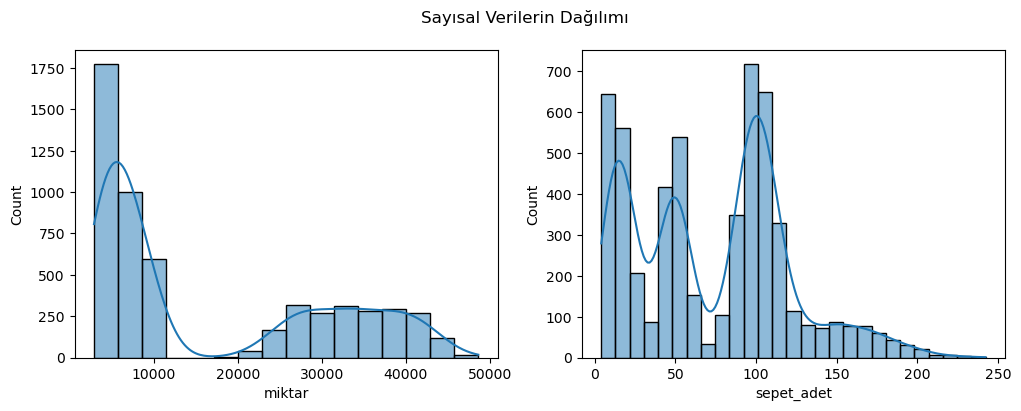

In [45]:
#sayısal değerlere ait dağılım grafiği
columns = ["gelir", "adet"]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, data=x_train, kde=True, ax=ax)

plt.suptitle('Sayısal Verilerin Dağılımı')
plt.show();

columns = ["miktar", "sepet_adet"]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, data=x_train, kde=True, ax=ax)

plt.suptitle('Sayısal Verilerin Dağılımı')
plt.show();

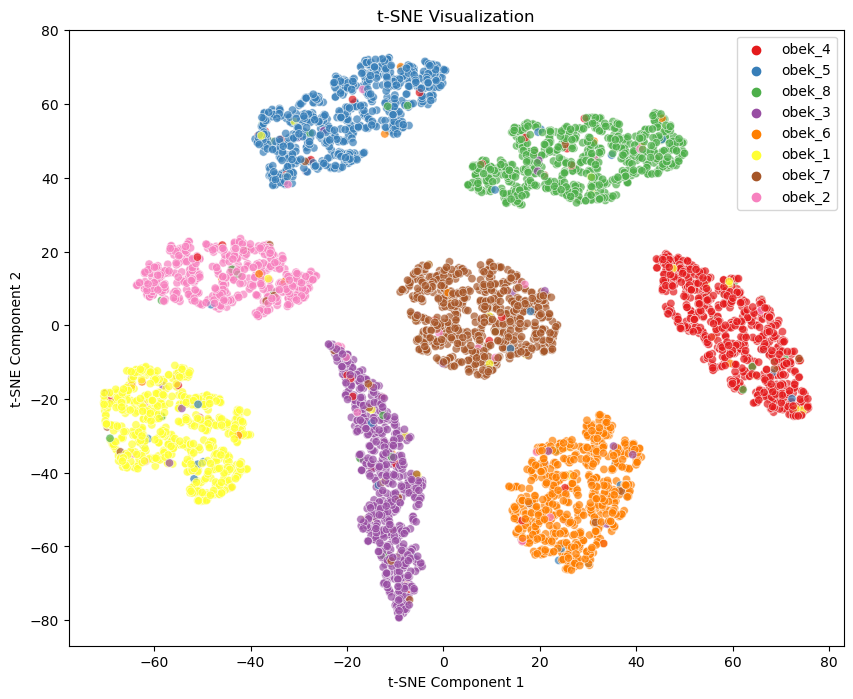

In [72]:
#t_sne
from sklearn.manifold import TSNE
data_normalized = (train[numerik] - train[numerik].mean()) / train[numerik].std()

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_normalized)

tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Target'] = train['obek']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Target', data=tsne_df, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization')
plt.legend()
plt.savefig('result.png')
plt.show()

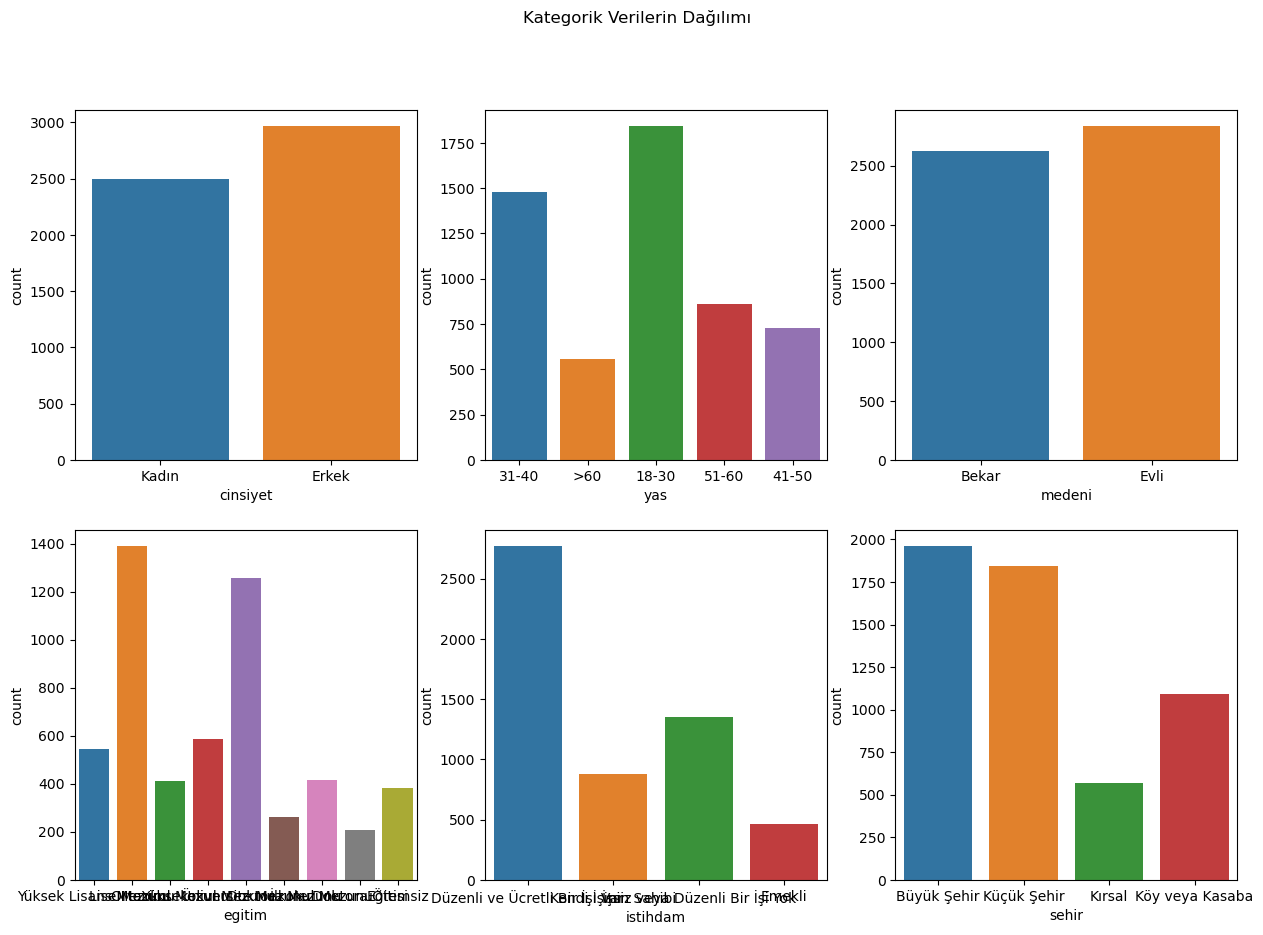

In [46]:
#kategorik değişkenlerin dağılımını gösteren grafikler
columns = kategorik

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=train, ax=ax)

plt.suptitle('Kategorik Verilerin Dağılımı')
plt.show();

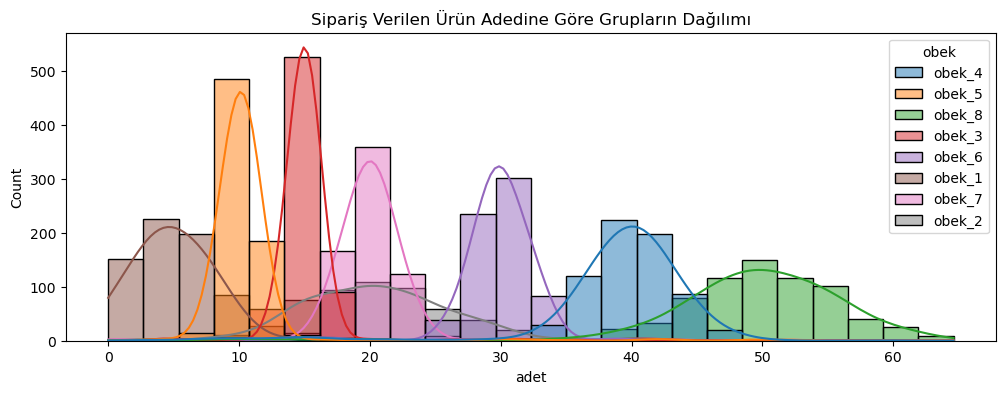

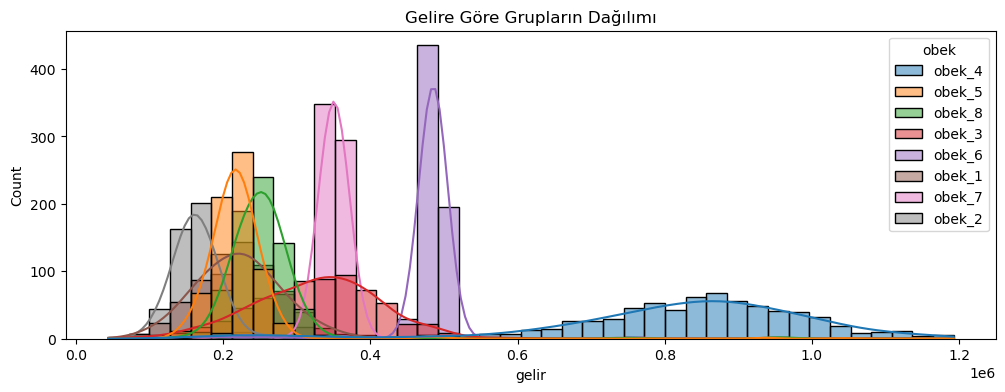

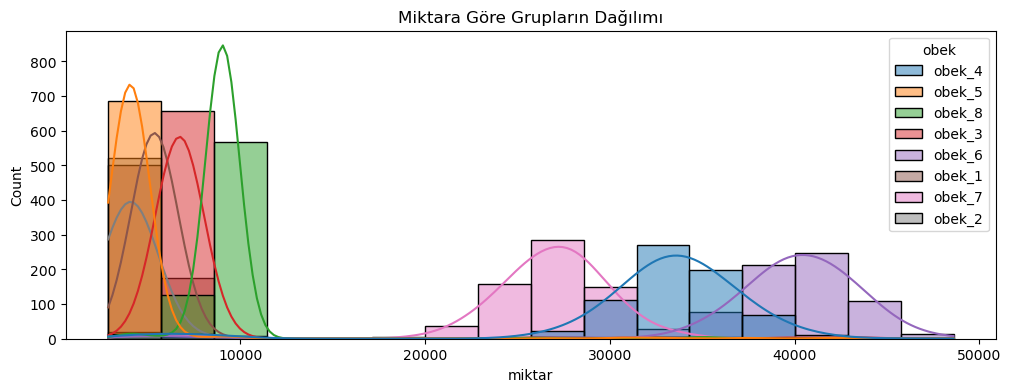

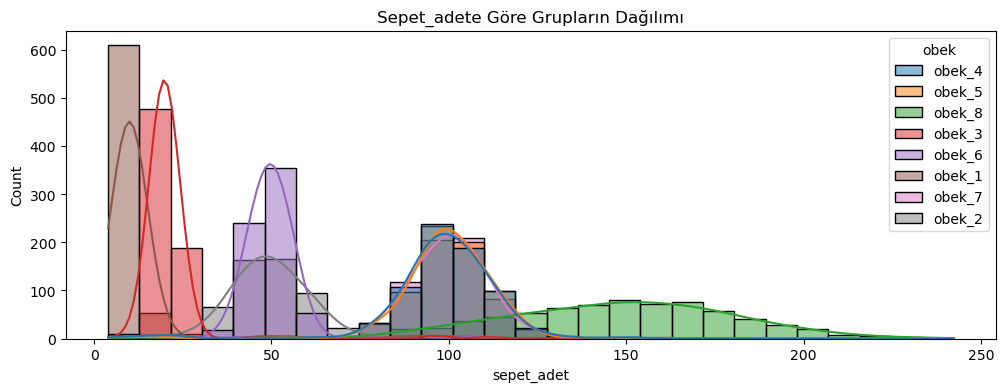

In [47]:
#sayısal veriler üzerine sınıfların dağılımı
plt.figure(figsize=(12, 4))
sns.histplot(data=train, x='adet', hue='obek', kde=True)
plt.title('Sipariş Verilen Ürün Adedine Göre Grupların Dağılımı');


plt.figure(figsize=(12, 4))
sns.histplot(data=train, x='gelir', hue='obek', kde=True)
plt.title('Gelire Göre Grupların Dağılımı');

plt.figure(figsize=(12, 4))
sns.histplot(data=train, x='miktar', hue='obek', kde=True)
plt.title('Miktara Göre Grupların Dağılımı');

plt.figure(figsize=(12, 4))
sns.histplot(data=train, x='sepet_adet', hue='obek', kde=True)
plt.title('Sepet_adete Göre Grupların Dağılımı');

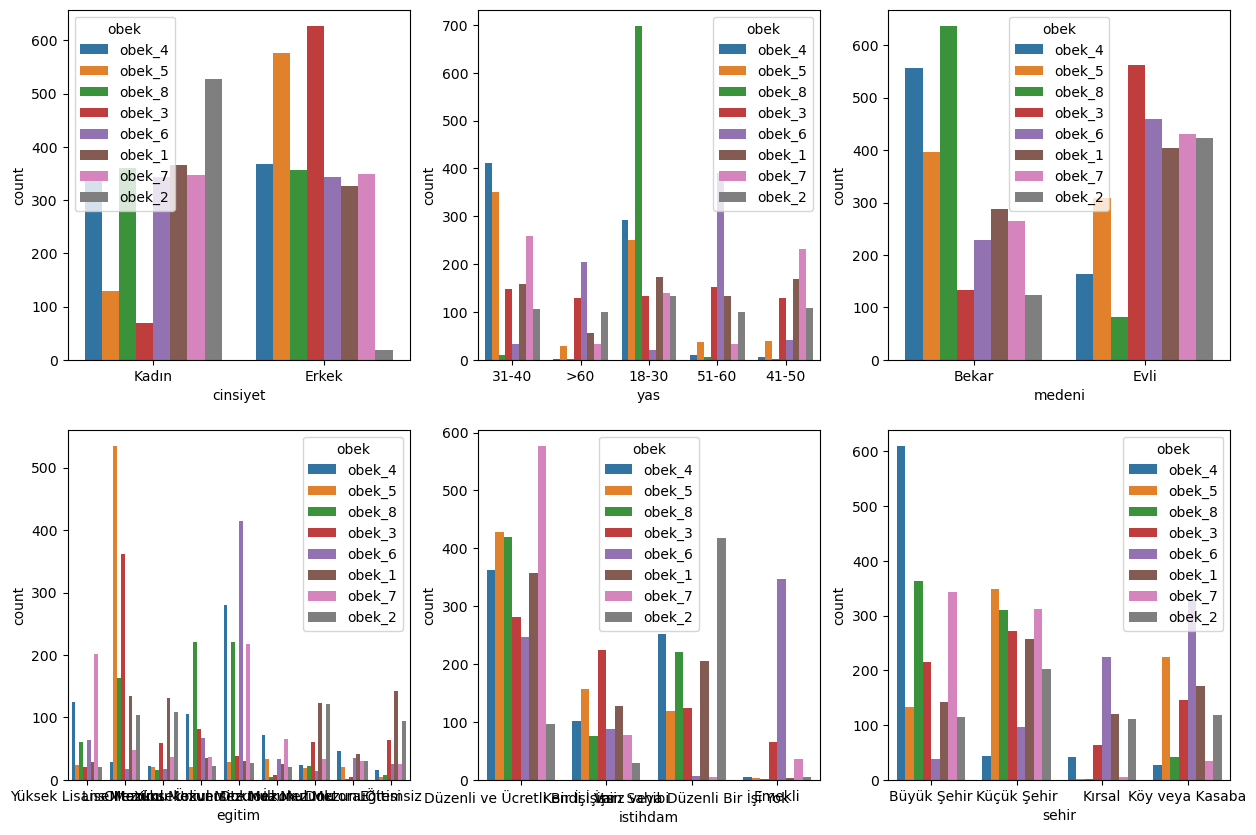

In [48]:
#kategorik veriler üzerine sınıfların dağılımı
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for col, ax in zip(kategorik, axes.flatten()):
    sns.countplot(x=col, data=train, hue="obek", ax=ax)

In [49]:
#sayısal veriler için korelasyon matrisi
korelasyon_matrisi=train[numerik].corr()
korelasyon_matrisi

,gelir,miktar,adet,sepet_adet
gelir,1.000000,0.740238,0.444398,0.145425
miktar,0.740238,1.000000,0.418499,0.133864
adet,0.444398,0.418499,1.000000,0.659455
sepet_adet,0.145425,0.133864,0.659455,1.000000


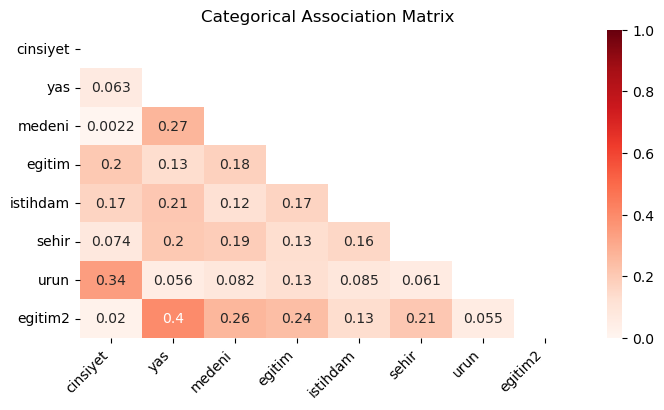

In [50]:
#kategorik veriler için olumsallık(contigency) tablosu
from scipy.stats import chi2_contingency
def plot_categorical_correlation_matrix(data, columns, figsize=(8, 4)):
    corr = pd.DataFrame(index=columns, columns=columns, dtype=np.float64)
    
    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                corr.loc[col1, col2] = 1.0
            else:
                cross_tab = pd.crosstab(data[col1], data[col2])
                chi2 = chi2_contingency(cross_tab)[0]
                min_dim = min(cross_tab.shape) - 1
                corr.loc[col1, col2] = np.sqrt(chi2 / (chi2 + data.shape[0] * min_dim))
    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap='Reds', mask=mask, vmin=0, vmax=1)
    plt.title('Categorical Association Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()
    
plot_categorical_correlation_matrix(train, kategorik)

Notlar: 
*Sınıf dengesizliği içermiyor, sınıf ağırlıkları veya örnek çoğaltmaya gerek yok
*Veri seti gruplara göre incelendiğinde aykırı değer içermiyor, 
*Eğitim değişkeni sıralayıcı(ordinal) ölçekte değerlendirilebilir.
*8 kategorik, 4 sayısal değişken var. Sayısal değişkenlerin tümü oransal ölçekli. 
*Gelir değişkeninin mod değeri 200-250b aralığında. 450b üzerinde diğerlerinden ayrılan bir grup var, normal dağılım eğilimi gösteren bu gruba ait olan tüm bireyler öbek4'e ait. 
*miktar değişkeninde bireyler 3-12b ve 18-50b aralığında ayrı ayrı yoğunlaşmış. 18b üzerinde olanlar öbek7, öbek4 ve öbek6 grubuna dahil. Diğer gruplar da 3-12b aralığında. 
*Sayısal değişkenlerde grupların dağılımları normal dağılım eğilimi gösteriyor. Her bir grup için verilerin teoride yaklaşık %99.7'sinin dahil olduğu +-3 standart sapma aralığını tespit edip, iç içe geçmeyen sınıflar için %0.03 hata payıyla gruplama imkanı var. Sayısal değişkenler bu değerlerden kategorik hale getirilebilir. Bu sayede model güçlendirmek mümkün olabilir. Sayısal değerler kullanılacaksa normal dağılım varsayımına sahip standart scaler kullanmak avantajlı olabilir.  
*Kategorik değişkenler üzerinde bazı gruplar belli özelliklere göre diğerlerinden ayrışıyor. Dikkatli inceleme yaparak bunların tespiti veriyi tanıma açısından önem arz ediyor. 
*gelir-miktar ve adet-sepet_adet değişkenleri arasında pozitif yönlü güçlü bir ilişkiden bahsedilebilir. Bu değişkenler üzerinde kombine işlemler ya da dönüşümler yapılarak gruplar arasında fark yaratacak daha güçlü değişkenler elde edilebilir. 

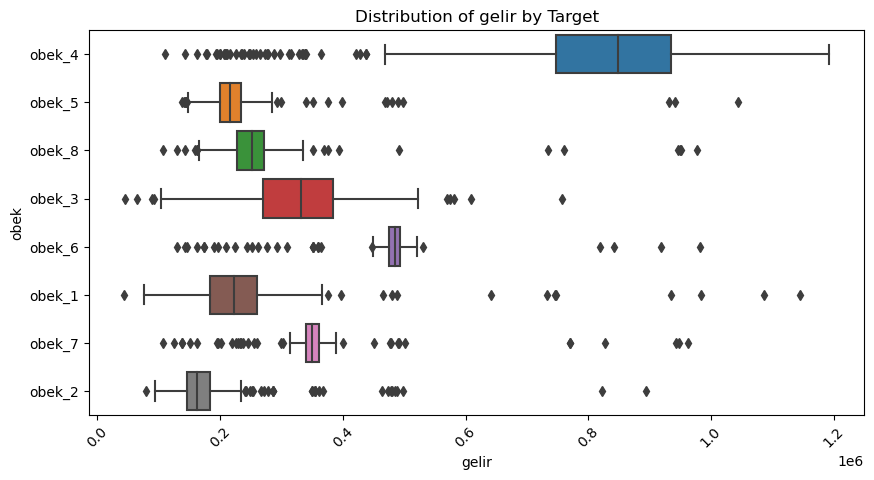

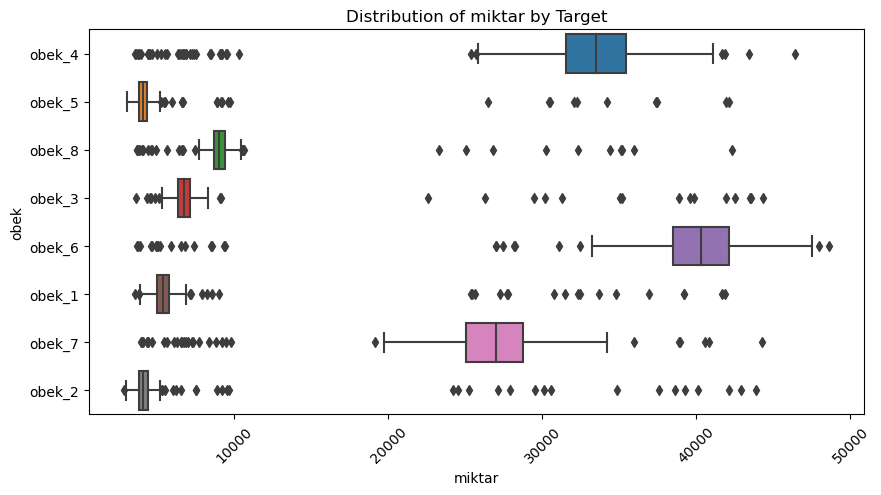

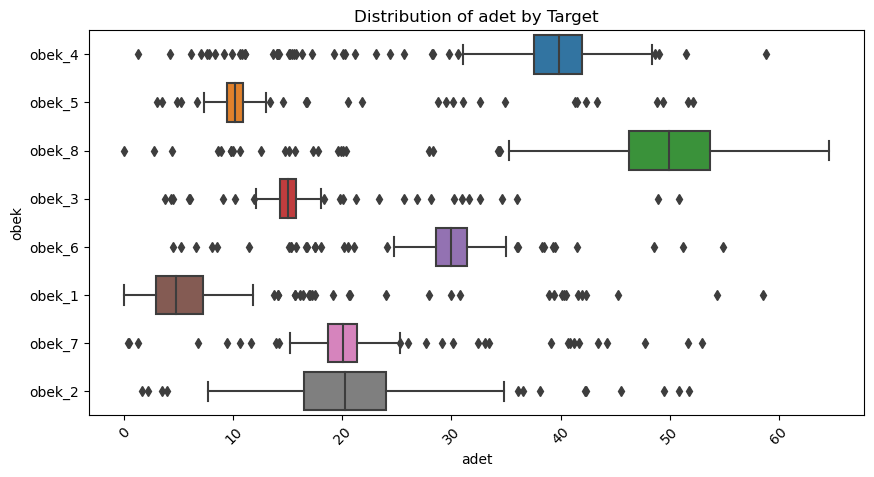

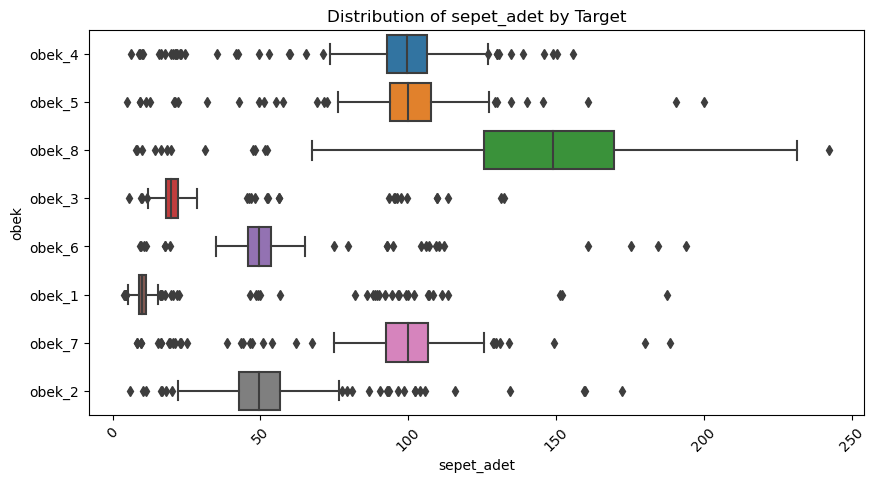

In [51]:
for etiket in numerik:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=etiket, y='obek', data=train)
    plt.title(f'Distribution of {etiket} by Target')
    plt.xticks(rotation=45)
    plt.show()

In [52]:
train['miktar_gelir_endeksi']=(train['miktar']/x_train['gelir'])*500
train['kararli']=(train['adet']/train['sepet_adet'])*100

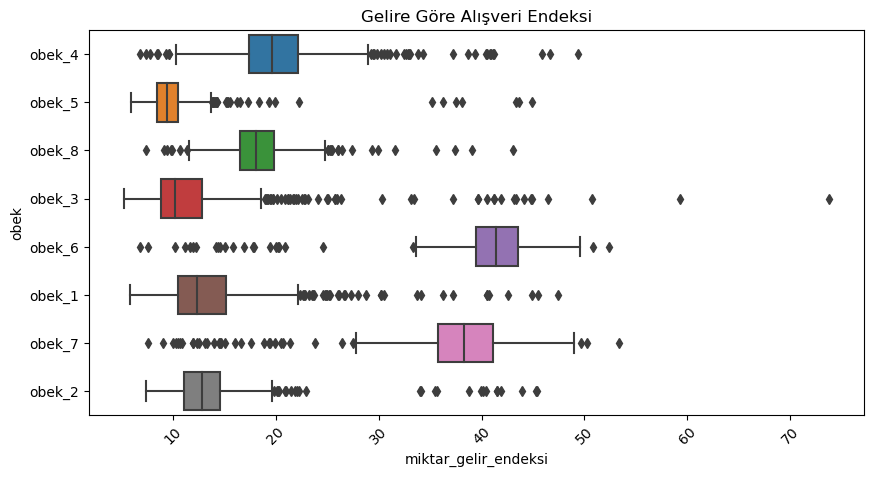

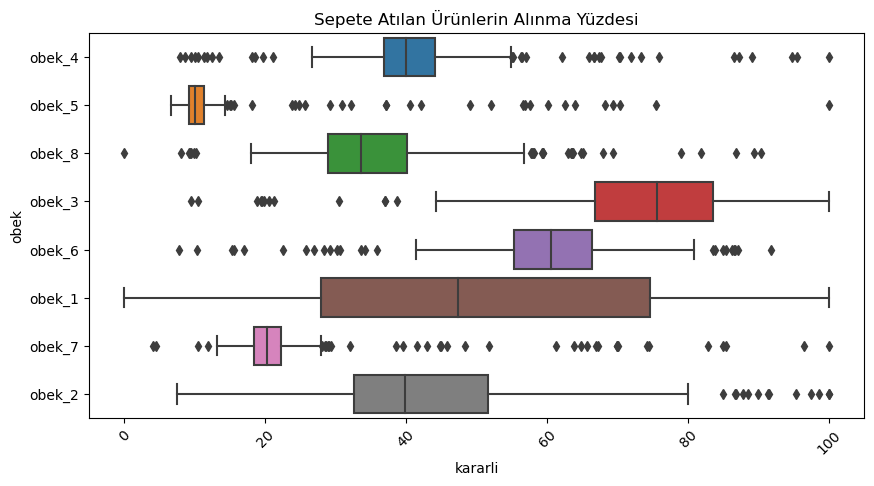

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='miktar_gelir_endeksi', y='obek', data=train)
plt.title('Gelire Göre Alışveri Endeksi')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='kararli', y='obek', data=train)
plt.title('Sepete Atılan Ürünlerin Alınma Yüzdesi')
plt.xticks(rotation=45)
plt.show()

In [54]:
train['miktar_gelir_endeksi']=pd.cut(train['miktar_gelir_endeksi'],bins=[0,28,60],labels=['az_öz_alır','varım_yogum_alisverise'])

aralik=[0,20,30,50,80,100]
etiket=['bakip_cikicam','belki_alırım','alabilirim','alirim','give_it_to_me']
train['kararli']=pd.cut(train['kararli'],bins=aralik,labels=etiket)

aralik=[0,300000,500000,20000000]
etiket=['düşük','orta','yüksek']
train['kgelir']=pd.cut(train['gelir'],bins=aralik,labels=etiket)

aralik=[0,14,25,49,100]
etiket=['az_siparis','orta_siparis','yüksek_siparis','aykırı_siparis']
train['kadet']=pd.cut(train['adet'],bins=aralik,labels=etiket)

aralik=[0,15000,35000,100000]
etiket=['az_miktarlı','orta_miktarli','yüksek_miktarlı']
train['kmiktar']=pd.cut(train['miktar'],bins=aralik,labels=etiket)

aralik=[0,25,75,125,300]
etiket=['sepet_az','sepet_orta','sepet_yüksek','sepet_aykırı']
train['ksepet_adet']=pd.cut(train['sepet_adet'],bins=aralik,labels=etiket)

kategorik_ek=['miktar_gelir_endeksi']+['kadet']+['kgelir']+['kmiktar']+['ksepet_adet']+['kararli']

In [55]:
def egitim_seviye(row):
    if row['egitim'] == 'Eğitimsiz':
        return 0
    if row['egitim'] == 'İlkokul Mezunu':
        return 1
    if row['egitim'] == 'Ortaokul Mezunu':
        return 2
    if row['egitim'] == 'Lise Mezunu':
        return 3
    if row['egitim'] == 'Yüksekokul Mezunu':
        return 4
    if row['egitim'] == 'Üniversite Mezunu':
        return 5
    if row['egitim'] == 'Yüksek Lisans Mezunu':
        return 6
    if row['egitim'] == 'Doktora Mezunu':
        return 7
    if row['egitim'] == 'Doktora Ötesi':
        return 8
    
    else:
        return 9
x_train['egitim_yeni']=x_train.apply(egitim_seviye,axis=1)

In [56]:
def frekanslar(dataframe):
    for k in kategorik:
        cat=pd.DataFrame()
        unique_val=dataframe[k].unique()
        for i in unique_val:
            x_df = dataframe[dataframe[k] == i]
            group_counts = x_df['obek'].value_counts()
            cat[i]=group_counts
        print(cat)
        print("-"*20)

In [57]:
def frekanslar_ek(dataframe):
    for k in kategorik_ek:
        cat=pd.DataFrame()
        unique_val=dataframe[k].unique()
        for i in unique_val:
            x_df = dataframe[dataframe[k] == i]
            group_counts = x_df['obek'].value_counts()
            cat[i]=group_counts
        print(cat)
        print("-"*20)

In [58]:
frekanslar(train)

        Kadın  Erkek
obek_2    528     19
obek_1    366    326
obek_8    360    357
obek_4    352    368
obek_7    347    348
obek_6    344    344
obek_5    130    576
obek_3     69    626
--------------------
        31-40  >60  18-30  51-60  41-50
obek_4    412    2    292      9      5
obek_5    350   28    251     37     40
obek_7    259   33    139     33    231
obek_1    159   56    174    134    169
obek_3    148  130    134    153    130
obek_2    106   99    134     99    109
obek_6     33  204     20    390     41
obek_8     10    2    697      6      2
--------------------
        Bekar  Evli
obek_8    636    81
obek_4    556   164
obek_5    397   309
obek_1    288   404
obek_7    265   430
obek_6    228   460
obek_3    133   562
obek_2    123   424
--------------------
        Yüksek Lisans Mezunu  Lise Mezunu  Ortaokul Mezunu  Yüksekokul Mezunu  \
obek_7                   201           47               37                 36   
obek_4                   125           29     

In [59]:
frekanslar_ek(train)

        az_öz_alır  varım_yogum_alisverise  NaN
obek_8         710                       7  NaN
obek_5         699                       7  NaN
obek_4         682                      38  NaN
obek_1         677                      15  NaN
obek_3         676                      18  NaN
obek_2         533                      14  NaN
obek_7          33                     662  NaN
obek_6          21                     667  NaN
--------------------
        yüksek_siparis  az_siparis  aykırı_siparis  orta_siparis  NaN
obek_4             686          15               3            16  NaN
obek_6             665           6               2            15  NaN
obek_8             291           9             407             9  NaN
obek_2             107          54               3           383  NaN
obek_7              17           8               2           668  NaN
obek_1              12         626               2            14  NaN
obek_5              11         687               3       

In [60]:
for k in kategorik:
    c=pd.get_dummies(x_train[k])
    x_train = pd.concat([x_train, c], axis='columns')
x_train.drop(kategorik,axis='columns',inplace = True)

In [61]:
for k in kategorik_ek:
    c=pd.get_dummies(train[k])
    x_train = pd.concat([x_train, c], axis='columns')
    x_train.columns

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)

In [63]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X_train, y_train, test_size=0.21, random_state=20)

In [64]:
#Aynı işlemleri test verisi için de gerçekleştiriyoruz
x_test=test_data.iloc[:,1:13]
x_test.columns=kolon_adlari

x_test.head()
x_test.describe(include="O")
x_test[x_test.duplicated()]

x_test['miktar_gelir_endeksi']=(x_test['miktar']/x_test['gelir'])*500
x_test['kararli']=(x_test['adet']/x_test['sepet_adet'])*100

x_test['miktar_gelir_endeksi']=pd.cut(x_test['miktar_gelir_endeksi'],bins=[0,28,60],labels=['az_öz_alır','varım_yogum_alisverise'])

aralik=[0,20,30,50,80,100]
etiket=['bakip_cikicam','belki_alırım','alabilirim','alirim','give_it_to_me']
x_test['kararli']=pd.cut(x_test['kararli'],bins=aralik,labels=etiket)

aralik=[0,300000,500000,20000000]
etiket=['düşük','orta','yüksek']
x_test['kgelir']=pd.cut(x_test['gelir'],bins=aralik,labels=etiket)

aralik=[0,14,25,49,100]
etiket=['az_siparis','orta_siparis','yüksek_siparis','aykırı_siparis']
x_test['kadet']=pd.cut(x_test['adet'],bins=aralik,labels=etiket)

aralik=[0,15000,35000,100000]
etiket=['az_miktarlı','orta_miktarli','yüksek_miktarlı']
x_test['kmiktar']=pd.cut(x_test['miktar'],bins=aralik,labels=etiket)

aralik=[0,25,75,125,300]
etiket=['sepet_az','sepet_orta','sepet_yüksek','sepet_aykırı']
x_test['ksepet_adet']=pd.cut(x_test['sepet_adet'],bins=aralik,labels=etiket)

kategorik_ek=['miktar_gelir_endeksi']+['kadet']+['kgelir']+['kmiktar']+['ksepet_adet']+['kararli']

x_test['egitim_yeni']=x_test.apply(egitim_seviye,axis=1)

for k in kategorik:
    c=pd.get_dummies(x_test[k])
    x_test = pd.concat([x_test, c], axis='columns')
x_test.drop(kategorik,axis='columns',inplace = True)

for k in kategorik_ek:
    c=pd.get_dummies(x_test[k])
    x_test = pd.concat([x_test, c], axis='columns')
x_test.drop(kategorik_ek,axis='columns',inplace = True)

x_train.shape[1]==x_test.shape[1]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(x_test)

In [65]:
#PARAMETRE OPTİMİZASYONU AÇIKLAMA KISMINDA YER ALIYOR

#PARAMETRE OPTİMİZASYONU
en_iyi_sonuc=0
n_=[1,10,20,50,100]
depth=[1,5,10,20]
features=[1,5,10,20]
leaf=[1,5,10,20]
from sklearn.metrics import confusion_matrix
for i in depth:
    for j in features:
        for k in leaf:
            for n in n_:
                from sklearn.ensemble import RandomForestClassifier
                classifier = RandomForestClassifier(n_estimators=n,max_depth=i,criterion='gini',max_features=j,random_state=20,min_samples_leaf=k)
                classifier.fit(Xtr,ytr)
                y_pred = classifier.predict(xte)
                cm=confusion_matrix(yte,y_pred)
                t=cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]
                if t>en_iyi_sonuc:
                    en_iyi_sonuc=t
                    parametreler=(n,i,j,k)
parametreler

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,max_depth=7,criterion='gini',max_features=10,random_state=30,min_samples_leaf=10)
classifier.fit(X_train,y_train)
y_test = classifier.predict(X_test)

/tmp/ipykernel_32/1357776727.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


In [67]:
y_test

array(['obek_3', 'obek_3', 'obek_2', ..., 'obek_7', 'obek_5', 'obek_6'],
      dtype=object)

In [68]:
submission = pd.DataFrame({'id': test_data['index'], 'Öbek İsmi': y_test})
submission.to_csv('submission.csv', index=False)